# Regresión Logística con SCIKIT-LEARN

## Regresión Logística Binaria, Ejercicio 1

Lo usaremos para clasificar situaciones con dos posibles estados binarios (1 - 0) (SI - NO), o en un numero finito de "etiquetas" o "clases" múltiples.
  
Algunos ejemplos de regresión logística son:
- Clasificar si un email es Spam o mo
- Un tumor clasificado como "benigno" o "maligno"

Conociendo el dataset, el profesor "Freddy Michael Kruege Myres", no tiene claro que tiempo recomendarles a sus estudiantes para que estudien para el examen y con ello garantizar las mejores notas. Por lo tanto recolecta la base de datos con los útimos 2000 exámenes onde están las horas que estudiaron y si aprobó o no. La base de datos esta disponible en: 

[Horas Estudio vs Aprobación](https://github.com/luisFernandoCastellanosG/Machine_learning/blob/master/Databaset's/horas_estudio_vs_aprobacion.csv])

### Paso 1: Importar librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Paso 2: Cargar Dataset


Cargar el Dataset al entorno de trabajo desde el repositorio de GitHub

In [ ]:
data = pd.DataFrame()
data = pd.read_csv(
    "https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Databaset's/horas_estudio_vs_aprobacion.csv", 
    encoding='utf-8')

### Paso 3: Conocer los datos

#### Obtener información de la data

De esta manera se unen: 
- ```python
data.head(n)  # Mostrar los datos n de la cabecera
```
- ```python
data.shape   # Conocer las dimensiones
```


In [ ]:
data.info

<bound method DataFrame.info of       horas  aprueba
0      0.50        1
1      2.00        0
2      0.75        0
3      2.75        1
4      2.75        1
...     ...      ...
1995   1.50        0
1996   1.75        0
1997   2.75        1
1998   4.75        0
1999   4.00        0

[2000 rows x 2 columns]>

#### Tipo de caracteristicas de la data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   horas    2000 non-null   float64
 1   aprueba  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [ ]:
data.describe()

,horas,aprueba
count,2000.000000,2000.000000
mean,2.647625,0.496000
std,1.415867,0.500109
min,0.250000,0.000000
25%,1.500000,0.000000
50%,2.750000,0.000000
75%,3.750000,1.000000
max,5.000000,1.000000


#### Revisar si hay datos nulos

In [ ]:
data.isnull().sum()

horas      0
aprueba    0
dtype: int64

#### Visualizar la distribución de los datos

##### Gráfica de horas

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


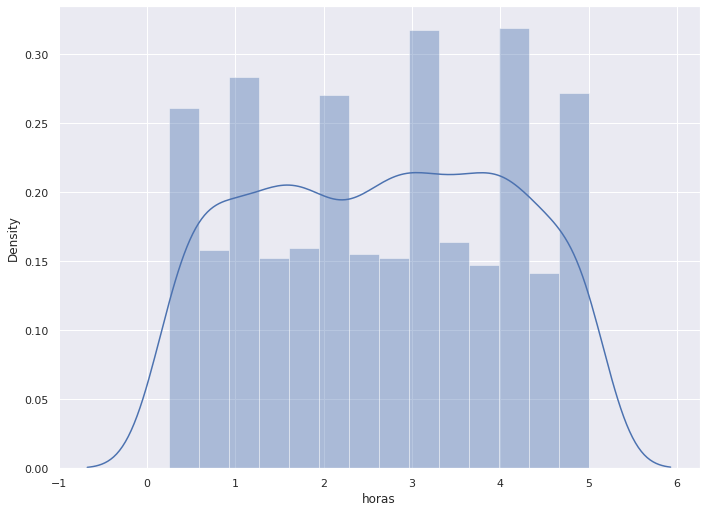

In [ ]:
sns.set(rc={'figure.figsize':(11.5, 8.5)})
sns.distplot(data['horas'])
plt.show()

##### Gráfica de aprobados

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


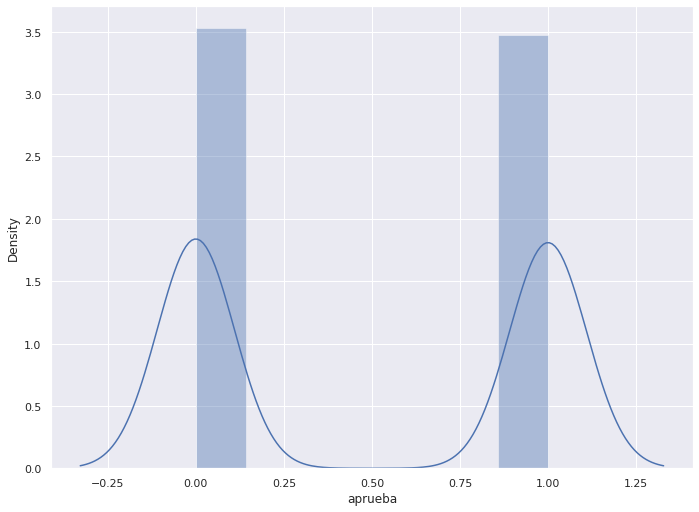

In [ ]:
sns.set(rc={'figure.figsize':(11.5, 8.5)})
sns.distplot(data['aprueba'])
plt.show()

##### Gráfica comparativa entre datos

Text(0, 0.5, 'Aprobación')

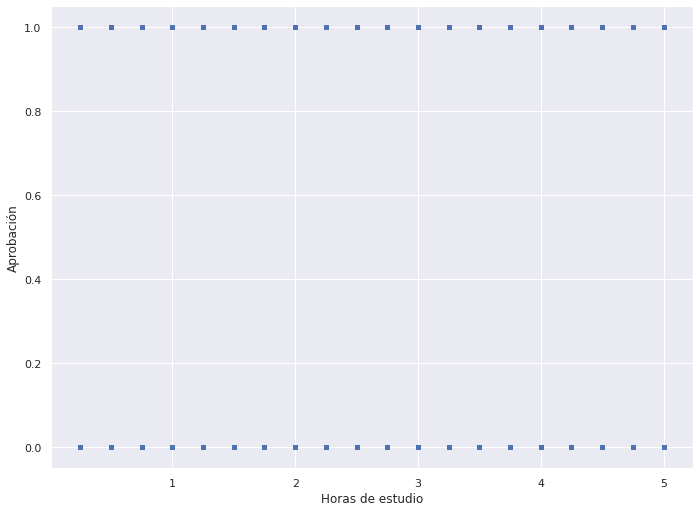

In [ ]:
X = data['horas']
y = data['aprueba']

plt.scatter(X, y, s=15, alpha=0.5)
plt.xlabel('Horas de estudio')
plt.ylabel('Aprobación')

### Paso 4: Preparar los datos

#### Datos en X

En X colocaremos el tiempo de estudio que tomaron los estudiantes antes del examen. Apilamos los datos que vienen en 1d a 2d: 

- Opción 1: Usar np.c_
```python
X = pd.DataFrame(np.c_[df['horas']], columns = ['horas'])
```
- Opción 2: usamos .reshape(-1, 1)
```python
X = np.array(df['horas']).reshape(-1, 1)
```

In [ ]:
Xtrain = np.array(data['horas']).reshape(-1, 1)

print(Xtrain)

[[0.5 ]
 [2.  ]
 [0.75]
 ...
 [2.75]
 [4.75]
 [4.  ]]


#### Datos en Y

En Y colocaremos el resultado del examen (1 / 0 ) (aprobado / reprobado)
```python
y= np.array(df['aprueba'])
```

In [ ]:
ytrain = np.array(data['aprueba'])

print(ytrain)

[1 0 0 ... 1 0 0]


### Paso 5: LogisticRegression de scikit-learn

#### Importar la librería de Regresión Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

#### Crear la instancia de regresión logística

In [ ]:
logistic_regression = LogisticRegression()

### Paso 6: Entrenar

In [ ]:
logistic_regression.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Paso 7: Predecir

#### Predicción sin separación de datos

Que pasa si se estudia entre 1 y 6 horas

In [ ]:
X_hours_study = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)

Predicción: Los 0 son reprobar, los 1 aprobación del examen

In [ ]:
prediction = logistic_regression.predict(X_hours_study)
print(prediction)

[0 0 0 1 1 1]


La predicción regresa que si se estudia entre 1 y 3 horas, no se aprobara el parcial, contrario a estudiar entre 4 y 6 horas

### Paso 8: Obtener probabilidades

Se analiza cúal es la probabilidad de que ocurran los anteriores eventos

In [ ]:
probability_prediction = logistic_regression.predict_proba(X_hours_study)

- La primera columna es la probabilidad de reprobar
- La segunda columna es la probabilidad de aprobar

In [ ]:
print(probability_prediction)

[[0.5112111  0.4887889 ]
 [0.50683522 0.49316478]
 [0.50245829 0.49754171]
 [0.49808099 0.50191901]
 [0.49370398 0.50629602]
 [0.48932793 0.51067207]]


Aqui se puede ver la probalidad de aprobar para las horas de estudio asignadas en la variable

In [ ]:
print(probability_prediction[:, 1])

[0.4887889  0.49316478 0.49754171 0.50191901 0.50629602 0.51067207]
